In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [22]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
!unzip "/content/drive/MyDrive/mlface/archive (4).zip"


Archive:  /content/drive/MyDrive/mlface/archive (4).zip
replace test/angry/im0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [24]:
import os
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")

3171 surprised images
4097 fearful images
3995 angry images
4830 sad images
4965 neutral images
7215 happy images
436 disgusted images


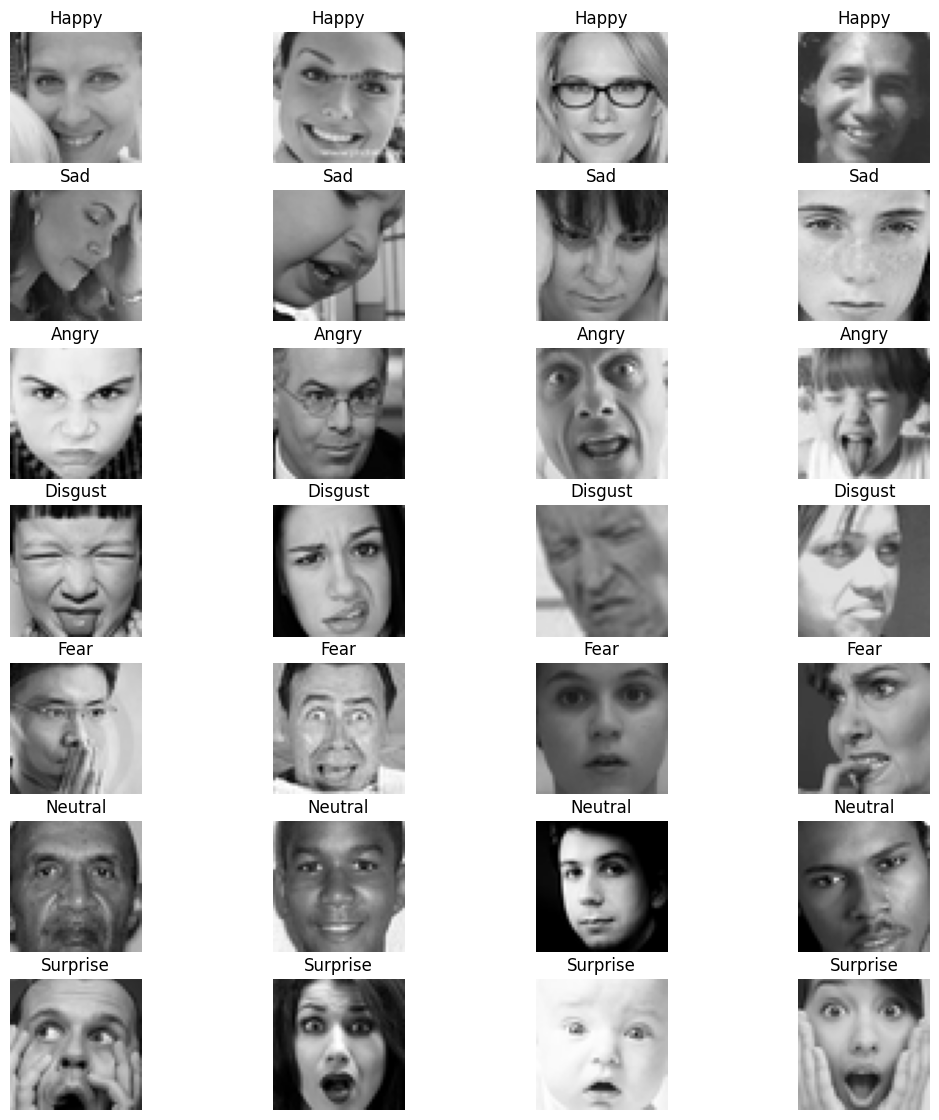

In [25]:
from PIL import Image
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

# Correct the paths and add glob pattern
happy_dir = glob("/content/train/happy/*.png")
sad_dir = glob("/content/train/sad/*.png")
angry_dir = glob("/content/train/angry/*.png")
disgust_dir = glob("/content/train/disgusted/*.png")
fear_dir = glob("/content/train/fearful/*.png")
neutral_dir = glob("/content/train/neutral/*.png")
surprise_dir = glob("/content/train/surprised/*.png")

# Check if directories are empty and handle the case
if not (happy_dir and sad_dir and angry_dir and disgust_dir and fear_dir and neutral_dir and surprise_dir):
    print("Error: One or more emotion directories are empty or the paths are incorrect.")
    print(f"Happy: {happy_dir}, Sad: {sad_dir}, Angry: {angry_dir}, etc.")
else:
    # Randomly select 4 images from each directory
    happy = np.random.choice(happy_dir, 4, replace=False)
    sad = np.random.choice(sad_dir, 4, replace=False)
    angry = np.random.choice(angry_dir, 4, replace=False)
    disgust = np.random.choice(disgust_dir, 4, replace=False)
    fear = np.random.choice(fear_dir, 4, replace=False)
    neutral = np.random.choice(neutral_dir, 4, replace=False)
    surprise = np.random.choice(surprise_dir, 4, replace=False)

    # Combine the data and labels
    data = np.concatenate((happy, sad, angry, disgust, fear, neutral, surprise))
    labels = 4 * ['Happy'] + 4 * ['Sad'] + 4 * ['Angry'] + 4 * ['Disgust'] + \
             4 * ['Fear'] + 4 * ['Neutral'] + 4 * ['Surprise']

    # Display the images
    N, R, C = 28, 7, 4
    plt.figure(figsize=(13, 14))
    for k, (src, label) in enumerate(zip(data, labels)):
        im = Image.open(src).convert('RGB')
        plt.subplot(R, C, k+1)
        plt.title(label)
        plt.imshow(np.asarray(im))
        plt.axis('off')
    plt.show()


In [27]:
!pip install --upgrade tensorflow
# Import the ImageDataGenerator class from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH = 48
HEIGHT = 48
BATCH_SIZE = 64
NUM_CLASSES = 7

TRAIN_DIR = "/content/train/"
TEST_DIR = "/content/test/"


In [29]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [30]:
validation_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [32]:
import os

# ... (your existing code) ...

# Create the validation directory if it doesn't exist
if not os.path.exists(TEST_DIR):
    os.makedirs(TEST_DIR)
    print(f"Created directory: {TEST_DIR}")
else:
    print(f"Directory already exists: {TEST_DIR}")

# ... (rest of your code, including validation_generator) ...

Created directory: /content/validation/


In [33]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(WIDTH,HEIGHT),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    color_mode="grayscale",
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(WIDTH,HEIGHT),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    color_mode="grayscale",
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 0 images belonging to 0 classes.


In [34]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Activation,BatchNormalization
from keras.layers import Dense
from keras.optimizers import Adam,RMSprop

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()

# Define the input layer
model.add(Input(shape=(WIDTH, HEIGHT, 1)))

# 1st Convolution layer
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution layer
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Convolution layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Fully connected layer 2nd layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Output layer
model.add(Dense(7, activation='softmax'))



In [37]:
#Using Adam optimizer and Learning rate as 0.001. You can play with this as well.
model.compile(optimizer=Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999),
              loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS = validation_generator.n//validation_generator.batch_size

history = model.fit(
    x = train_generator,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = VALIDATION_STEPS
)

Epoch 1/15
281/448 ━━━━━━━━━━━━━━━━━━━━ 26:44 10s/step - accuracy: 0.2646 - loss: 1.7593

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
#gets index assigned to class labels and converts it to list!
class_labels = list(train_generator.class_indices.keys())
class_labels

In [ ]:
MODEL_FILE = "Facial_Recognition.model"
model.save(MODEL_FILE)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from keras.models import load_model
model = load_model('Facial_Recognition.model')
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
img = cv2.imread('Test_Sad.jpg',0)
cv2_imshow(img)
img = cv2.resize(img,(WIDTH,HEIGHT))
img = np.reshape(img,[1,WIDTH,HEIGHT,1])
classes = model.predict(img)
highest_probab_class = model.predict_classes(img)

print("Probabilities for both classes : ", classes)
print("Max Prob class : ", highest_probab_class)
print("Image classified to : ", class_labels[int(highest_probab_class)])